
# <img src='../imgs/OOIPY_Logo.png' align="center" width=100> Demo Notebook - CTD Data


This Jupyter Notebook walks through the basic functionality of accessing and proccessing CTD data using OOIpy.

This code has the ability to bin CTD data in depth and time, which the data explorer doesn't have. But, before working with this, I'd highly recomend seeing if the [OOI Data Explorer](https://dataexplorer.oceanobservatories.org/) can handle your needs.

## In this demo you will learn:
- How to download CTD data from OOI server
- How to compute and plot sound speed and other parameter profiles from the data

## Environment Setup

In [25]:
import ooipy
import datetime
from matplotlib import pyplot as plt

# Some Jupyter magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# set up you username and token for accessing data from the OOI ververs
# this function has to be called only once, since a file with the loging information will be
# generated and stored in the project folder
USERNAME = 'YOUR_USERNAME'
TOKEN =  'YOUR_TOKEN'
ooipy.request.authentification.set_authentification(USERNAME, TOKEN)

In [5]:
# request 1-hour of CTD data from the oregonoffshore location
start = datetime.datetime(2016, 12, 12, 2, 0, 0)
end = datetime.datetime(2016, 12, 12, 3, 0, 0)
ctd_data = ooipy.request.ctd_request.get_ctd_data(start, end, 'oregon_offshore', limit=10000)
print('CTD data object: ', ctd_data)
print('number of data points: ', len(ctd_data.raw_data))
print('first data point: ', ctd_data.raw_data[0])

CTD data object:  <ooipy.ctd.basic.CtdData object at 0x000001C7CD5CD088>
number of data points:  10872
first data point:  {'practical_salinity': 33.75423905606145, 'seawater_pressure': 153.74031116196912, 'corrected_dissolved_oxygen': 113.94956396866611, 'density_qc_executed': 29, 'driver_timestamp': 3690496800.536956, 'conductivity': 1450066, 'seawater_pressure_qc_results': 29, 'practical_salinity_qc_results': 29, 'temperature': 425763, 'density': 1026.845002282935, 'corrected_dissolved_oxygen_qc_executed': 29, 'corrected_dissolved_oxygen_qc_results': 29, 'seawater_temperature_qc_results': 29, 'pressure_temp': 19380, 'internal_timestamp': 0.0, 'seawater_conductivity_qc_results': 13, 'pk': {'node': 'SF01B', 'stream': 'ctdpf_sbe43_sample', 'subsite': 'CE04OSPS', 'deployment': 3, 'time': 3690496800.4713826, 'sensor': '2A-CTDPFA107', 'method': 'streamed'}, 'ext_volt0': 17344, 'seawater_temperature': 9.01622453592222, 'ingestion_timestamp': 3690496803.285, 'port_timestamp': 3690496800.4713

In [8]:
import time
# request 1-day of CTD data from the oregonoffshore location
day = datetime.datetime(2016, 12, 12)
t = time.time()
ctd_data = ooipy.request.ctd_request.get_ctd_data_daily(day, 'oregon_offshore')
print(time.time() - t)
print('CTD data object: ', ctd_data)
print('number of data points: ', len(ctd_data.raw_data))
print('first data point: ', ctd_data.raw_data[0])

125.71719217300415
CTD data object:  <ooipy.ctd.basic.CtdData object at 0x000001C7D0954788>
number of data points:  260864
first data point:  {'practical_salinity': 33.82165688650687, 'seawater_pressure': 176.347996290567, 'corrected_dissolved_oxygen': 98.94351422990738, 'density_qc_executed': 29, 'driver_timestamp': 3690507600.771317, 'conductivity': 1447711, 'seawater_pressure_qc_results': 21, 'practical_salinity_qc_results': 21, 'temperature': 429657, 'density': 1027.0402154820579, 'corrected_dissolved_oxygen_qc_executed': 29, 'corrected_dissolved_oxygen_qc_results': 21, 'seawater_temperature_qc_results': 29, 'pressure_temp': 18714, 'internal_timestamp': 0.0, 'seawater_conductivity_qc_results': 13, 'pk': {'node': 'SF01B', 'stream': 'ctdpf_sbe43_sample', 'subsite': 'CE04OSPS', 'deployment': 3, 'time': 3690507600.665928, 'sensor': '2A-CTDPFA107', 'method': 'streamed'}, 'ext_volt0': 15889, 'seawater_temperature': 8.769562164397144, 'ingestion_timestamp': 3690507601.616, 'port_timestamp

In [9]:
# temperature, salinity, and pressure are stored in attributes of the ctd_data object
print('temperature: ', ctd_datactd_data.temperature)
print('pressure: ', ctd_data.pressure)
print('salinity: ', ctd_data.salinity)

temperature:  [ 8.76956216  8.76962527  8.76930975 ...,  4.88344473  4.88350127
  4.88361436]
pressure:  [ 176.34799629  176.30100894  176.25399346 ...,  586.10150378  586.10572239
  586.10825355]
salinity:  [ 33.82165689  33.82141799  33.82154021 ...,  34.1415655   34.14157464
  34.14145791]


In [26]:
# compute sound speed profile for daily data
c_profile = ctd_data.get_profile(600, 'sound_speed')

C:\Users\fschwock\AppData\Local\Continuum\anaconda3\envs\obspy\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\fschwock\AppData\Local\Continuum\anaconda3\envs\obspy\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\fschwock\AppData\Local\Continuum\anaconda3\envs\obspy\lib\site-packages\numpy\core\fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\fschwock\AppData\Local\Continuum\anaconda3\envs\obspy\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\fschwock\AppData\Local\Continuum\anaconda3\envs\obspy\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### Plot sound speed profile

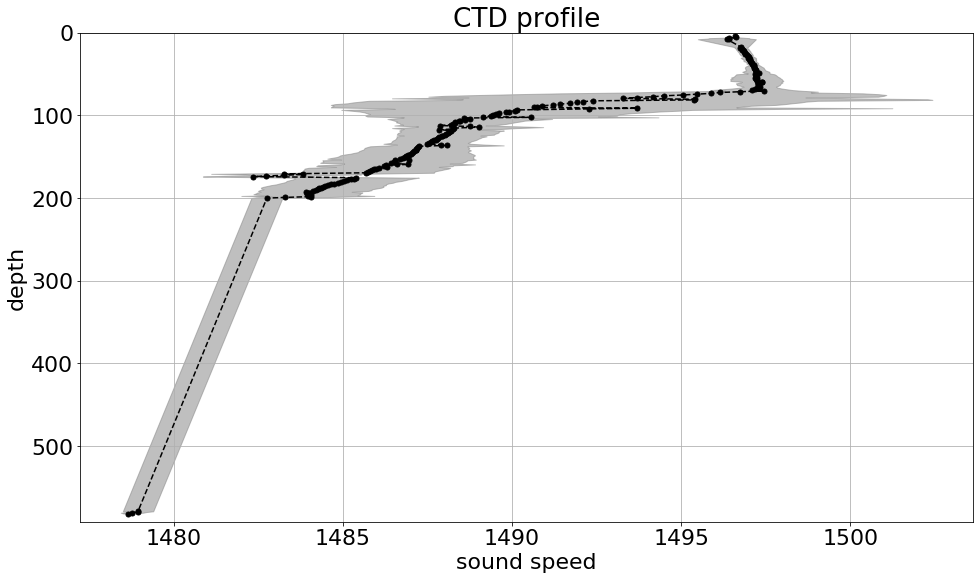

In [ ]:
# 1. calling plot function as method of c_profile
c_profile.plot(xlabel='sound speed')

(700, 0)

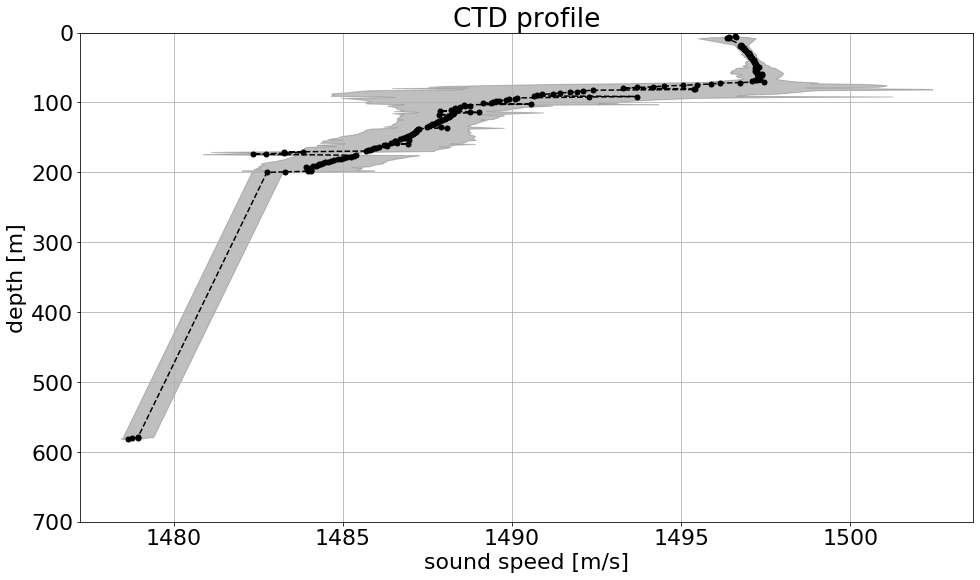

In [20]:
# 1. calling OOIPy's plot function. This allows for changing the plot parameters
# after calling the plot function just like in matplotlib, or addind additional
# graphs into the plot
from matplotlib import pyplot as plt
ooipy.plot(c_profile)
plt.ylabel('depth [m]')
plt.xlabel('sound speed [m/s]')
plt.ylim([700, 0])